<h1> Data Analysis Project:Titanic Dataset </h1> 

<h3> By  ANANTHA SAI AVADHANAM </h3>
<p>  Date:21/05/2021</p>

<p>In this notebook, we're going to analyse the famous Titanic dataset from Kaggle.<br>
    we are going to do analysis on the survival chances of passengers based on various factors and categories.</p>
    <p>we will answer the following questions</p>
    <ul><p>Who were the passengers on the Titanic? (based on categories like age, gender, class.. etc)<br>
What deck were the passengers on and how does that relate to their class?<br>
Where did the passengers come from?(City)<br>
What is the relation between survival chance and passenger travelling status?(Alone or with Family)<br>
    What are the factors affected a passenger in the process of survival in the disaster?</p></ul>

<p> Importing the necessary packages</p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<p>The dataset related to titanic information is downloaded from kaggle<br>
 Reading the dataset using read_csv()</p>

In [10]:
titan_df = pd.read_csv('tested.csv')

<p> To take a glance at the dataset(use head(),info(),describe())</p>

In [11]:
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
titan_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h4> Visualizing the differences of passengers based on Sex</h4>

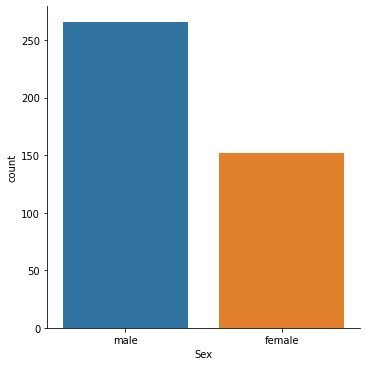

In [19]:
sns.catplot(x='Sex',data=titan_df,kind='count')

<p> We can see that male passengers are more than female passengers</p>
<h4>Visualizing passengers based on Sex and Pclass</h4>

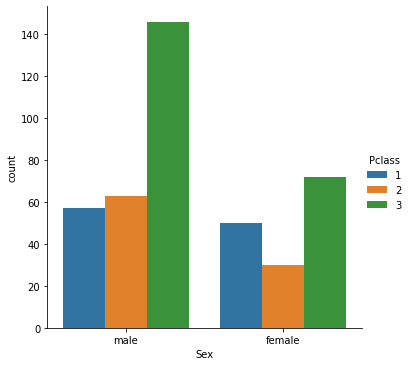

In [20]:
sns.catplot(x='Sex',data=titan_df,kind='count',hue='Pclass')

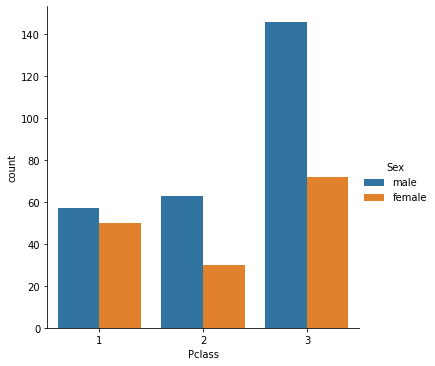

In [21]:
sns.catplot(x='Pclass',data=titan_df,kind='count',hue='Sex')

<p> we can see that relative male population is higher in third class than other 2 classes.</p>
<h4>We try to find the distribution among the passengers and their survival chances(Male,Female,Children).</h4>

In [26]:
def category(passenger):
    return 'child' if passenger['Age'] <16 else passenger['Sex']
titan_df['Person']=titan_df.apply(category,axis=1)

In [45]:
new=titan_df.groupby(['Person','Survived'])
new.describe()

PassengerId                                                   \
                      count         mean         std     min     25%     50%   
Person Survived                                                                
child  0               19.0  1089.368421  126.725079   897.0   976.5  1086.0   
       1               13.0  1139.692308   91.677319  1009.0  1067.0  1155.0   
female 1              139.0  1092.776978  125.406819   893.0   981.0  1089.0   
male   0              247.0  1103.639676  119.158720   892.0  1000.5  1109.0   

                                Pclass            ... Parch        Fare  \
                    75%     max  count      mean  ...   75%  max  count   
Person Survived                                   ...                     
child  0         1186.0  1284.0   19.0  2.631579  ...   2.0  2.0   19.0   
       1         1188.0  1301.0   13.0  2.538462  ...   2.0  2.0   13.0   
female 1         1205.5  1306.0  139.0  2.107914  ...   1.0  9.0  139.0   
male   0         1206.0  1309.0  247.0  2.311741  ...   0.0  9.0  246.0   

                                                                            \
                      mean        std      min       25%     50%       75%   
Person Survived                                                              
child  0         42.898021  61.256029   3.1708  14.45000  21.075  31.94375   
       1         25.743908  12.007686  12.1833  15.75000  20.575  39.00000   
female 1         51.992658  76.003262   6.9500   8.05000  22.025  59.40000   
male   0         26.340752  39.025284   0.0000   7.85105  11.925  26.00000   

                           
                      max  
Person Survived            
child  0         262.3750  
       1          46.9000  
female 1         512.3292  
male   0         262.3750  

[4 rows x 48 columns]

<h4>Plotting survival for different Person categories</h4>

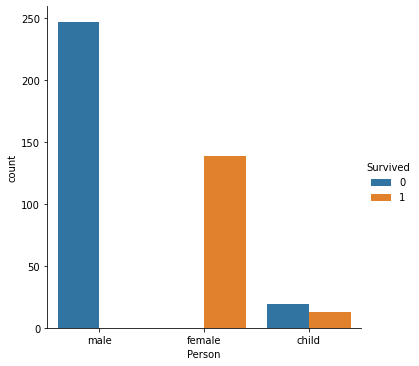

In [33]:
sns.catplot(x='Person',kind='count',hue='Survived',data=titan_df)


<p> In the available data,we can see that no male passengers survived the disaster and all the female passengers are survived.</p>
<h4>Plotting based on Pclass and Person</h4>

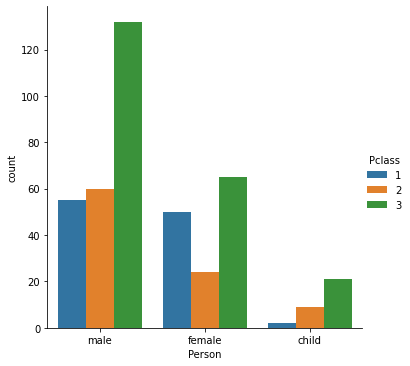

In [48]:
sns.catplot(x='Person',kind='count',data=titan_df,hue='Pclass')

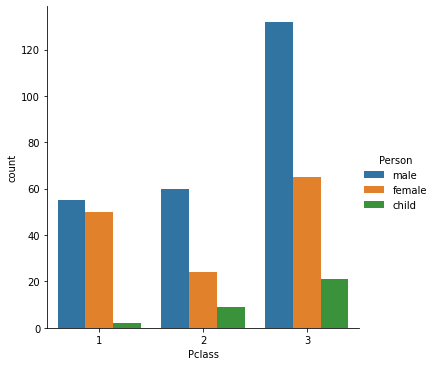

In [49]:
sns.catplot(x='Pclass',kind='count',data=titan_df,hue='Person')

<h3>We try to find the distribution of passengers based on Age and Sex in different classes</h3> 

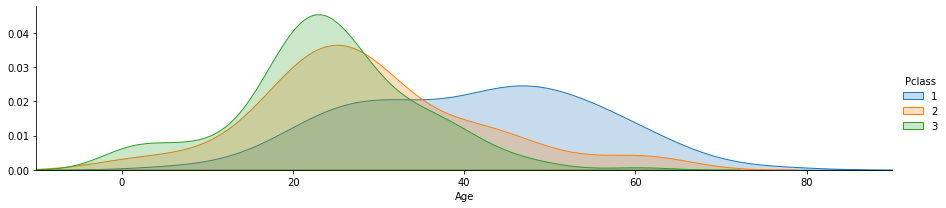

In [75]:
sns.color_palette("Set2")
plo=sns.FacetGrid(titan_df,hue='Pclass',aspect=4.2)
plo.map(sns.kdeplot,'Age',shade='True')
plo.set(xlim=(-10,90))
plo.add_legend()

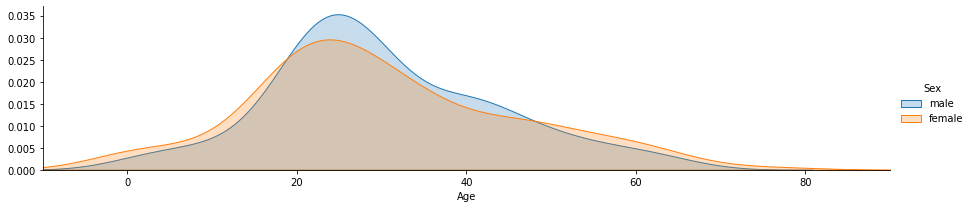

In [76]:
plo2=sns.FacetGrid(titan_df,hue='Sex',aspect=4.2)
plo2.map(sns.kdeplot,"Age",shade=True)
plo2.set(xlim=(-10,90))
plo2.add_legend()

<h3>Now,we are trying to find the distribution and Analysis of passengers based on Decks</h3>
<h4>We will filter the records containing NULL values to analyze th passengers</h4>

In [77]:
deck_df=titan_df.dropna(axis=0)

In [78]:
deck_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Pclass       87 non-null     int64  
 3   Name         87 non-null     object 
 4   Sex          87 non-null     object 
 5   Age          87 non-null     float64
 6   SibSp        87 non-null     int64  
 7   Parch        87 non-null     int64  
 8   Ticket       87 non-null     object 
 9   Fare         87 non-null     float64
 10  Cabin        87 non-null     object 
 11  Embarked     87 non-null     object 
 12  Person       87 non-null     object 
dtypes: float64(2), int64(5), object(6)
memory usage: 9.5+ KB


In [79]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,female
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,female
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,female
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,female
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,male


<p>By noticing the Cabin values, we notice that it is a combination of Cabin and room number.</p>
<h4> We divide the passengers based on their Cabin </h4>
<p>We will seperate the Cabin values</p>

In [83]:
def getdec(passe):
    return passe['Cabin'][0]
deck_df['Deck']=deck_df.apply(getdec,axis=1)

d:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,female,B
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,female,E
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,female,B
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,female,B
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,male,A


<h4>Plotting distribution of passengers based on Cabin numbers</h4> 

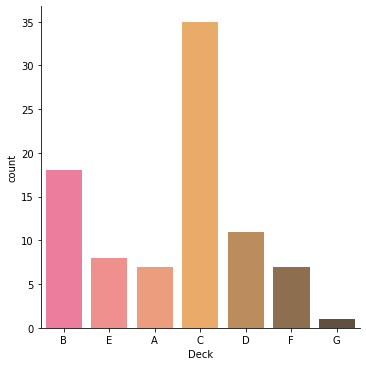

In [93]:
sns.catplot(x="Deck",kind="count",data=deck_df,palette='spring_d')

<p> We notice that C cabin has higher number of passengers</p>
<h4>We will find the distribution of passengers based on classes and Deck</h4>

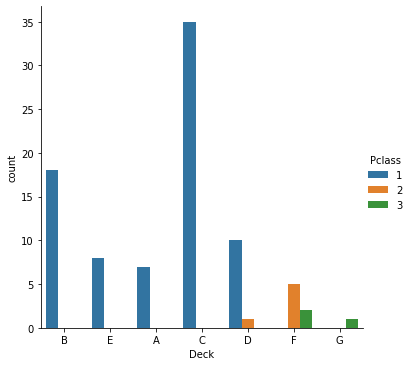

In [97]:
sns.catplot(x='Deck',kind='count',data=deck_df,hue='Pclass')

<p> We notice that Decks(A,B,C,D,E) related to class 1 and Decks(D,F) related to class 2 and Decks(F,G) related to class3</p>
<h4>We will find the distribution of passengers based on the embarked cities</h4>
<ul><p>S=Southampton<br>
    Q=Queenstown<br>
    c=Cherbourg</p></ul>

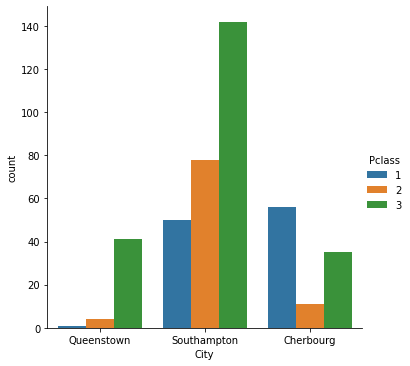

In [103]:
def getcity(passe):
    em=passe['Embarked']
    if em=='Q':
        return 'Queenstown'
    if em=='S':
        return 'Southampton'
    return 'Cherbourg'
titan_df['City']=titan_df.apply(getcity,axis=1)
sns.catplot(data=titan_df,kind='count',x='City',hue='Pclass')

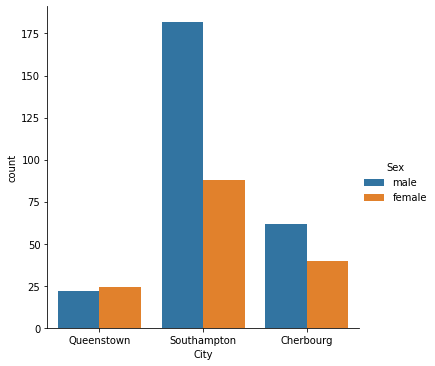

In [104]:
sns.catplot(data=titan_df,x="City",hue="Sex",kind='count')

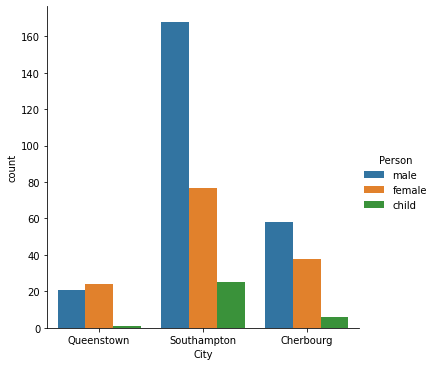

In [105]:
sns.catplot(data=titan_df,x='City',hue='Person',kind='count')

<p> We can see that more number of passengers are from Sothampton city</p>

In [106]:
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,City
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,male,Queenstown
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,female,Southampton
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,male,Queenstown
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,male,Southampton
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,female,Southampton


<h3> Now we will try to find the relation between survival chances of a passenger and the number of relatives he/she is travelling with.</h3> 
<p>In the dataset,the SibSp column refers to the number of siblings travelling and Parch refers to parents.<br>
    If number of SibSp and Parch is equal to zero then the passenger is Alone.</p>

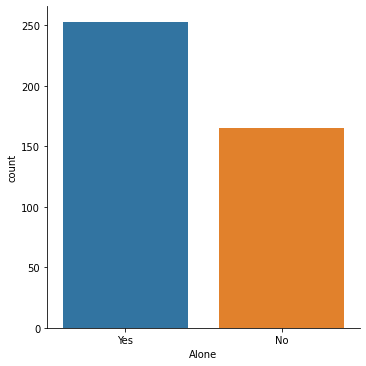

In [107]:
def isalone(passe):
    if passe['SibSp']+passe['Parch']>0:
        return 'No'
    return 'Yes'
titan_df['Alone']=titan_df.apply(isalone,axis=1)
sns.catplot(data=titan_df,x='Alone',kind='count')

<p>We can see that majority of the passengers are travelling alone.</p>
<h4>Distribution of passengers based on Alone column and Sex,Pclass,Person.</h4>

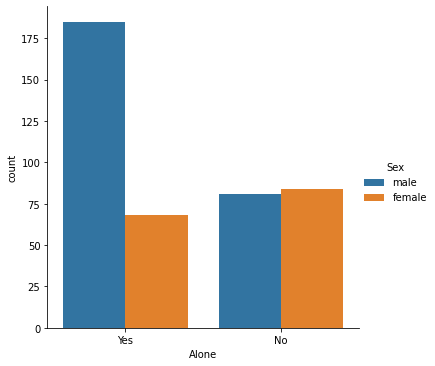

In [108]:
sns.catplot(data=titan_df,x='Alone',kind='count',hue='Sex')

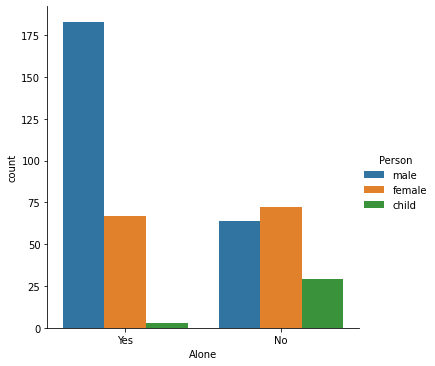

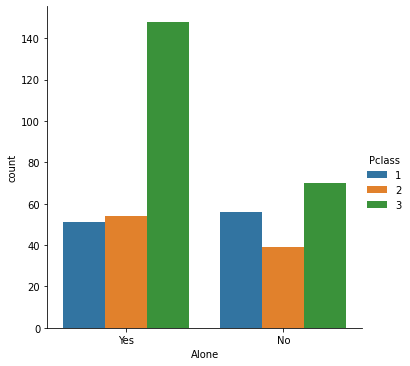

In [110]:
sns.catplot(data=titan_df,x='Alone',kind='count',hue='Person')
sns.catplot(data=titan_df,x='Alone',kind='count',hue='Pclass')

<h2>Let's,Find the relation between Survival chances and Pclass</h2>

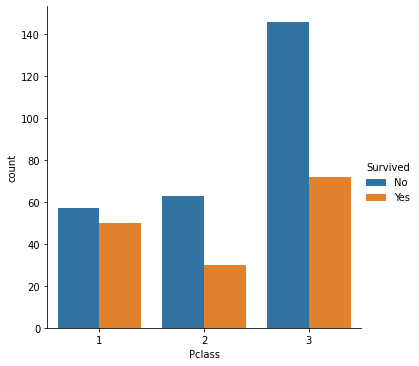

In [117]:
def getsur(passe):
    return "Yes" if passe['Survived']==1 else "No"
titan_df['Survived']=titan_df.apply(getsur,axis=1)
sns.catplot(x='Pclass',kind='count',hue='Survived',data=titan_df)

In [130]:
f_df=titan_df[titan_df['Pclass']==1]
s_df=titan_df[titan_df['Pclass']==2]
t_df=titan_df[titan_df['Pclass']==3]


<h4>In class 1,Survived vs Person.</h4>

Text(0.5, 1.0, 'Class 1')

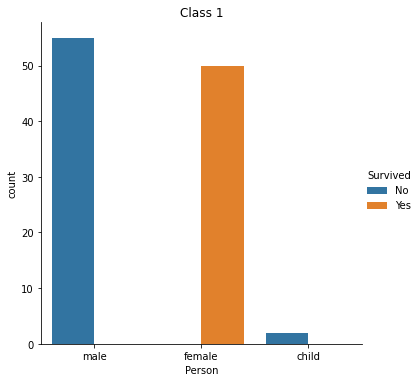

In [139]:
sf=sns.catplot(data=f_df,x="Person",kind='count',hue='Survived')
sf.ax.set_title("Class 1")

<h4>In class 2,Survived vs Person.</h4>

Text(0.5, 1.0, 'Class 2')

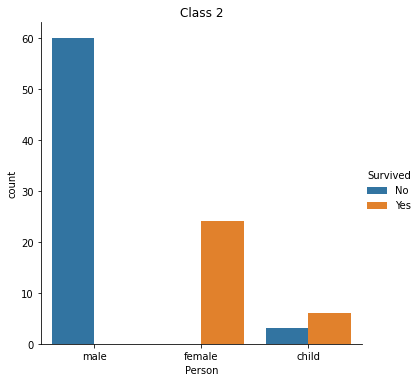

In [140]:
ss=sns.catplot(data=s_df,x="Person",kind='count',hue='Survived')
ss.ax.set_title("Class 2")

<h4>In class 3,Survived vs Person.</h4>

Text(0.5, 1.0, 'Class 3')

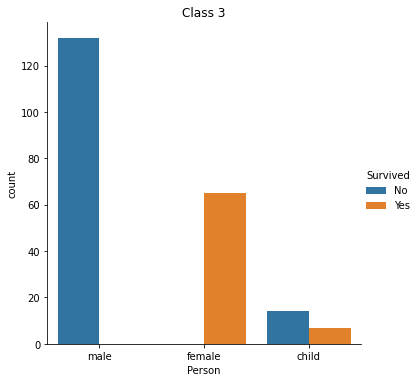

In [141]:
st=sns.catplot(data=t_df,x="Person",kind='count',hue='Survived')
st.ax.set_title("Class 3")

<h3>Let's see the survival chances of passengers based on Age</h3>

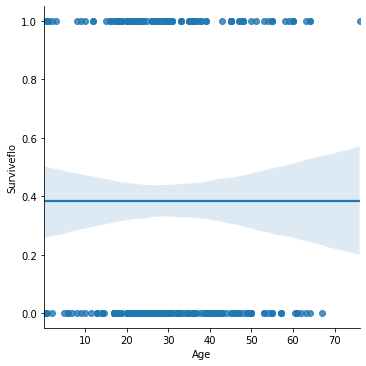

In [146]:
def convst(passe):
    return 0 if passe['Survived']=='No' else 1
titan_df['Surviveflo']=titan_df.apply(convst,axis=1)
sns.lmplot(x='Age',y='Surviveflo',data=titan_df)

<p>Let's take a look,if Pclass has any affect on Survival chances distributed among different ages.</p>

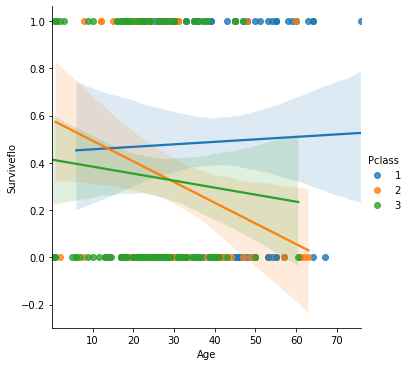

In [147]:
sns.lmplot(x='Age',y='Surviveflo',data=titan_df,hue='Pclass')

<p> We can see from above both graphs that passengers with age greater than 50 has lower chance of surviving.</p>
<h3>Lets's find whether a person has higher survival chance if he is alone or not.</h3> 

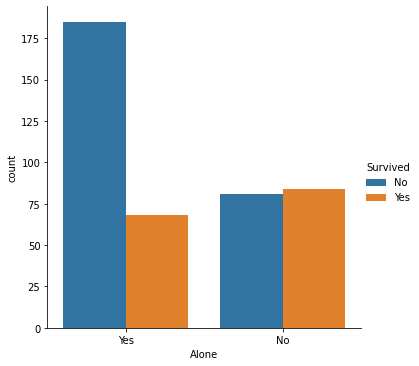

In [151]:
sns.catplot(data=titan_df,x='Alone',hue='Survived',kind='count')

<h4>Passengers travelling alone have lower chance of survival when compared to passengers who are not alone.</h4>

<h3>Now Let's get into math and find the survival probailities of passengers based on different categories.</h3>

In [186]:
total=titan_df.shape[0]
num_total_sur=titan_df[titan_df['Survived']=="Yes"].shape[0]
alone=titan_df[titan_df['Alone']=="Yes"]
not_alone=titan_df[titan_df['Alone']=="No"]
num_alone=alone.shape[0]
num_not_alone=not_alone.shape[0]
num_alone_sur=alone[alone['Survived']=="Yes"].shape[0]
num_not_alone_sur=not_alone[not_alone['Survived']=="Yes"].shape[0]
f_sur=f_df[f_df['Survived']=='Yes']
num_first=f_df.shape[0]
num_first_sur=f_sur.shape[0]
s_sur=s_df[s_df['Survived']=='Yes']
num_second=s_df.shape[0]
num_second_sur=s_sur.shape[0]
t_sur=t_df[t_df['Survived']=='Yes']
num_third=t_df.shape[0]
num_third_sur=t_sur.shape[0]
male=titan_df[titan_df['Person']=='male']
num_male=male.shape[0]
num_male_sur=male[male['Survived']=="Yes"].shape[0]
female=titan_df[titan_df['Person']=='female']
num_female=female.shape[0]
num_female_sur=female[female['Survived']=="Yes"].shape[0]
child=titan_df[titan_df['Person']=='child']
num_child=child.shape[0]
num_child_sur=child[child['Survived']=="Yes"].shape[0]
S_em=titan_df[titan_df['Embarked']=="S"]
num_s=S_em.shape[0]
num_s_sur=S_em[S_em['Survived']=="Yes"].shape[0]
Q_em=titan_df[titan_df['Embarked']=="Q"]
num_q=Q_em.shape[0]
num_q_sur=Q_em[Q_em['Survived']=="Yes"].shape[0]
C_em=titan_df[titan_df['Embarked']=="C"]
num_c=C_em.shape[0]
num_c_sur=C_em[C_em['Survived']=="Yes"].shape[0]

In [193]:
print("probability for Total passengers survival::",num_total_sur/total)

probability for Total passengers survival:: 0.36363636363636365


<h2>Report: Based on the available data,Survival chance of a passenger is 36%.</h2>
    <p>This may vary based on class and Sex and Age.</p>
    <h4>Below is the detailed report.</h4>

In [191]:
print("------------------Probabilities:------------------------")
print("probability for alone passengers survival::",num_alone_sur/num_alone)
print("probability for family passengers survival::",num_not_alone_sur/num_not_alone)
print("probability for male survival::",num_male_sur/num_male)
print("probability for female survival::",num_female_sur/num_female)
print("probability for children survival::",num_child_sur/num_child)
print("probability for first class passengers survival::",num_first_sur/num_first)
print("probability for second class passengers survival::",num_second_sur/num_second)
print("probability for third class passengers survival::",num_third_sur/num_third)
print("probability for  Southampton passengers survival::",num_s_sur/num_s)
print("probability for  Queenstown passengers survival::",num_q_sur/num_q)
print("probability for  Cherbourg passengers survival::",num_c_sur/num_c)
print()
print("probability for Total passengers survival::",num_total_sur/total)

------------------Probabilities:------------------------
probability for alone passengers survival:: 0.26877470355731226
probability for family passengers survival:: 0.509090909090909
probability for male survival:: 0.0
probability for female survival:: 1.0
probability for children survival:: 0.40625
probability for first class passengers survival:: 0.4672897196261682
probability for second class passengers survival:: 0.3225806451612903
probability for third class passengers survival:: 0.3302752293577982
probability for  Southampton passengers survival:: 0.32592592592592595
probability for  Queenstown passengers survival:: 0.5217391304347826
probability for  Cherbourg passengers survival:: 0.39215686274509803

probability for Total passengers survival:: 0.36363636363636365


<h2>Reported by ANANTHA SAI AVADHANAM</h2>